<a href="https://colab.research.google.com/github/Ansuman09/RESUME/blob/main/NBAwinrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this project we try to find some correlation between the presence of supporters and win rate of teams in various sports.

The correlation of average population and win loss rate of the teams is 0.5467116349533602
The correlation of average population and win loss rate of the teams is 0.3099015952155624


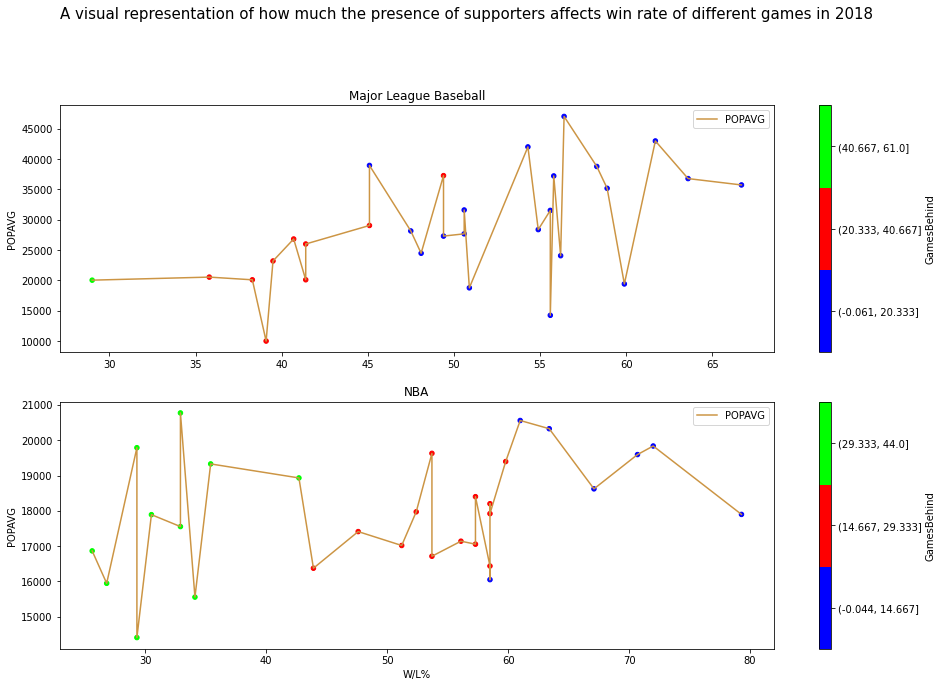

In [88]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

nba=pd.read_csv('nba.csv')
nba.columns=nba.columns.str.strip()

nba=nba[nba['year']==2018]

#preparing the population data
pop2018=pd.read_html('http://www.espn.com/nba/attendance/_/year/2018')[0]
pop2018.columns=pop2018.iloc[1]
pop2018.drop([0,1],axis=0,inplace=True)
pop2018=pop2018[['TEAM','TOTAL','AVG']]
pop2018.columns=['team','POPTOTAL','POPAVG','k','k']
pop2018=pop2018[['team','POPTOTAL','POPAVG']]
pop2018.reset_index(inplace=True)


nba['team']=nba['team'].str.extract('([^*(]+)')
nba['team']=nba['team'].str.extract('(?:[^ ]+)(.+)')
nba['team']=nba['team'].str.strip()

#dictionary for renaming nbateams
rename={
    'York Knicks':'NY Knicks',
    'State Warriors':'Warriors',
    'City Thunder':'Thunder',
    'Antonio Spurs':'Spurs',
    'Angeles Lakers':'Lakers',
    'Angeles Clippers':'Clippers',
    'Orleans Pelicans':'Pelicans'
    }
nba['team'].replace(rename,inplace=True)

#Preparing the Final NBA data for plotting
nba2018=pd.merge(nba,pop2018,how='inner',on='team')
nba2018.replace({'—':0},inplace=True)
nba2018['W/L%']=nba2018['W/L%'].astype('float64')*100
nba2018['POPTOTAL']=nba2018['POPTOTAL'].astype(int)
nba2018['POPAVG']=nba2018['POPAVG'].astype(int)
nba2018['GB']=nba2018['GB'].astype(float)
nba2018['GamesBehind']=pd.cut(nba2018['GB'],bins=3)

nba2018=nba2018.set_index('W/L%')
nba2018.sort_index(inplace=True)
nba2018.reset_index(inplace=True)


#mlb data
mlb=pd.read_csv('mlb.csv')
mlb=mlb[mlb['year']==2018]
mlb

#preparing the population data
mlbpop=pd.read_html('https://www.espn.com/mlb/attendance/_/year/2018')[0]
mlbpop.columns=mlbpop.iloc[1]
mlbpop.drop([0,1],axis=0,inplace=True)
mlbpop=mlbpop[['TEAM','TOTAL','AVG']]
mlbpop.columns=['team','POPTOTAL','POPAVG','k','k']
mlbpop=mlbpop[['team','POPTOTAL','POPAVG']]
mlbpop.reset_index(inplace=True)
mlb['team']=mlb['team'].str.extract('(\w+)(?:[ ])')

#Preparing the Final MLB data for plotting
renamemlb={
    'Louis':'St. Louis',
    'Kansas' : 'Kansas City',
    'Tampa' :'Tampa Bay'
}

mlb['team']=mlb['team'].replace(renamemlb)
mlb['team'][[1,8,13,18,21,25,28,29]]=['NY Yankees','Chicago White Sox','LA Angels','NY Mets','Chicago Cubs','LA Dodgers','San Francisco','San Diego']

mlb2018=pd.merge(mlb,mlbpop,how='inner',on='team')
mlb2018['W-L%']=mlb2018['W-L%'].astype('float64')*100
mlb2018['POPTOTAL']=mlb2018['POPTOTAL'].astype(int)
mlb2018['POPAVG']=mlb2018['POPAVG'].astype(float)
mlb2018=mlb2018.set_index('W-L%')
mlb2018.sort_index(inplace=True)
mlb2018.reset_index(inplace=True)
mlb2018.rename(columns={'W-L%':'W/L%'},inplace=True)
mlb2018.replace({'--':0},inplace=True)
mlb2018['GB']=mlb2018['GB'].astype(float)
mlb2018['GamesBehind']=pd.cut(mlb2018['GB'],bins=3)


#PLOTTING
fig,(ax1,ax2) = plt.subplots(2,1,sharex=False,sharey=False,figsize=(16,10))
mlb2018.plot('W/L%','POPAVG',ax=ax1,c='#CC9544')
mlb2018.plot.scatter('W/L%','POPAVG',ax=ax1,c='GamesBehind',colormap='brg')
ax1.set_title('Major League Baseball',size=12)
ax1.set_xlabel('')
ax1.set_ylabel('Average Population')

nba2018.plot('W/L%','POPAVG',ax=ax2,c='#CC9544')
nba2018.plot.scatter('W/L%','POPAVG',ax=ax2,c='GamesBehind',colormap='brg')
ax2.set_title('NBA')
ax1.set_ylabel('Average Population')

fig.text(0.125,1,'A visual representation of how much the presence of supporters affects win rate of different games in 2018',size=15)

mlb_corr=mlb2018['POPAVG'].corr(mlb2018['W/L%'])
nba_corr=nba2018['POPAVG'].corr(nba2018['W/L%'])
print('The correlation of average population and win loss rate of the teams is {}'.format(mlb_corr))
print('The correlation of average population and win loss rate of the teams is {}'.format(nba_corr))


### As we have found and observed in the year 2018 the average supporters in the stadium and the performance of the teams are positively co-related more so in MLB than in NBA as we can see some of the teams with low win-loss percentage still had huge support.

###So now we try to see how much have the presence of supporters affected MLB games.

The correlation of average population and win loss rate of the teams is 0.47629919866769066


<Figure size 432x288 with 0 Axes>

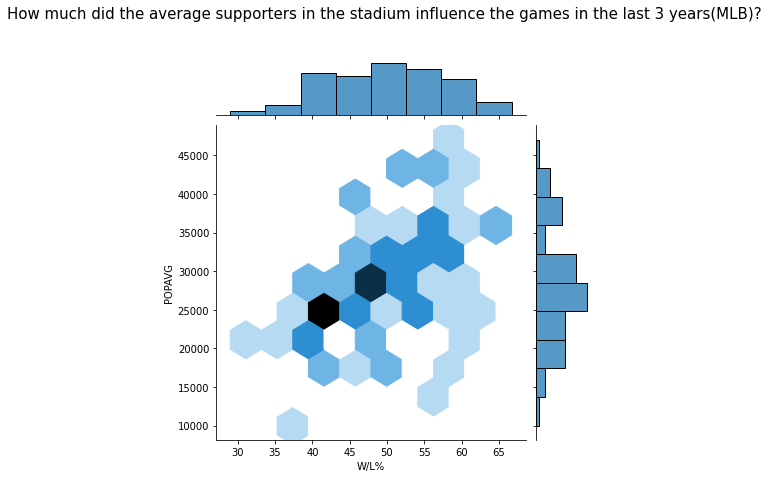

In [48]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


mlb_o=pd.read_csv('mlb.csv')
mlb=mlb_o[mlb_o.year>=2016]

#Preparing the population data
pop2018=pd.read_html('https://www.espn.com/mlb/attendance/_/year/2018')[0]
pop2017=pd.read_html('https://www.espn.com/mlb/attendance/_/year/2017')[0]
pop2016=pd.read_html('https://www.espn.com/mlb/attendance/_/year/2016')[0]

def arrange_pop(mlbpop):
  mlbpop.columns=mlbpop.iloc[1]
  mlbpop.drop([0,1],axis=0,inplace=True)
  mlbpop=mlbpop[['TEAM','TOTAL','AVG']]
  mlbpop.columns=['team','POPTOTAL','POPAVG','k','k']
  mlbpop=mlbpop[['team','POPTOTAL','POPAVG']]
  mlbpop.reset_index(inplace=True)  
  return mlbpop

pop2018=arrange_pop(pop2018)
pop2018['year']=[2018]*30
pop2017=arrange_pop(pop2017)
pop2017['year']=[2017]*30
pop2016=arrange_pop(pop2016)
pop2016['year']=[2016]*30

pop=pd.concat([pop2018,pop2017,pop2016],axis=0)
mlb['team']=mlb['team'].str.extract('(\w+)(?:[ ])')
renamemlb={
    'Louis':'St. Louis',
    'Kansas' : 'Kansas City',
    'Tampa' :'Tampa Bay'
}

mlb['team']=mlb['team'].replace(renamemlb)
mlb['team'][[1,8,13,18,21,25,28,29]]=['NY Yankees','Chicago White Sox','LA Angels','NY Mets','Chicago Cubs','LA Dodgers','San Francisco','San Diego']

#Preparing the final data for plotting
mlb2018=pd.merge(mlb,pop,how='inner',on=['team','year'])
mlb2018['W-L%']=mlb2018['W-L%'].astype('float64')*100
mlb2018['POPTOTAL']=mlb2018['POPTOTAL'].astype(int)
mlb2018['POPAVG']=mlb2018['POPAVG'].astype(float)
mlb2018=mlb2018.set_index('W-L%')
mlb2018.sort_index(inplace=True)
mlb2018.reset_index(inplace=True)
mlb2018.rename(columns={'W-L%':'W/L%'},inplace=True)

#PLOTTING
plt.figure()
jntplot=sns.jointplot(mlb2018['W/L%'],mlb2018['POPAVG'],kind='hex')
jntplot.fig.suptitle('How much did the average supporters in the stadium influence the games in the last 3 years(MLB)?',size=15,x=0.5,y=1.1);

mlb_corr=mlb2018['POPAVG'].corr(mlb2018['W/L%'])
print('The correlation of average population and win loss rate of the teams is {}'.format(mlb_corr))


###Teams with win rate above 45% seem to have a huge number of average supporters.

###Although teams performed better with more number of supporters with a correlation value of 0.476 it wasn't the only parameter that dictated the outcome of the games.